# Adatbázis-műveletek 2. (concat, join, apply, pivot)


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

Olvassuk be megint az érettségis táblázatot.

In [4]:
df=pd.read_csv("data/erettsegi.csv.gz",sep=";",index_col=0)

Készítsünk egy kisebb, jobban átlátható táblázatot demonstrációs célra.

In [5]:
subdf=df[['intézmény városa','vizsgázó képzési típusa',
          'vizsgázó neme','vizsga szintje','írásbeli pontszám']].head(2)

## Összefűzés, Concat

Két *DataFrame*-et összefűzhetünk egymás alá, ha a `pd.concat()` függvénynek egy ugyanannyi oszlopból álló *DataFrame*-eket tartalmazó listát adunk oda.

Példánkban kétszer egymás alá írjuk ugyanazt a *DataFrame*-et.

In [6]:
cdf=pd.concat([subdf,subdf])
cdf

,intézmény városa,vizsgázó képzési típusa,vizsgázó neme,vizsga szintje,írásbeli pontszám
0,Budapest,gimnázium,férfi,közép,NaN
1,Budapest,gimnázium,nõ,közép,NaN
0,Budapest,gimnázium,férfi,közép,NaN
1,Budapest,gimnázium,nõ,közép,NaN


Figyeljünk, hogy az újonann összerakott táblázat indexei még az eredeti táblázatokból valók. 

In [7]:
cdf.loc[0]

,intézmény városa,vizsgázó képzési típusa,vizsgázó neme,vizsga szintje,írásbeli pontszám
0,Budapest,gimnázium,férfi,közép,NaN
0,Budapest,gimnázium,férfi,közép,NaN


Készíthetünk új indexet, megtartva a régit is.

In [8]:
cdf=pd.concat([subdf,subdf]).reset_index()
cdf

,index,intézmény városa,vizsgázó képzési típusa,vizsgázó neme,vizsga szintje,írásbeli pontszám
0,0,Budapest,gimnázium,férfi,közép,NaN
1,1,Budapest,gimnázium,nõ,közép,NaN
2,0,Budapest,gimnázium,férfi,közép,NaN
3,1,Budapest,gimnázium,nõ,közép,NaN


Vagy eldobva azt.

In [9]:
cdf=pd.concat([subdf,subdf]).reset_index(drop=True)
cdf

,intézmény városa,vizsgázó képzési típusa,vizsgázó neme,vizsga szintje,írásbeli pontszám
0,Budapest,gimnázium,férfi,közép,NaN
1,Budapest,gimnázium,nõ,közép,NaN
2,Budapest,gimnázium,férfi,közép,NaN
3,Budapest,gimnázium,nõ,közép,NaN


A másik tengely mentén is összepakolhatunk táblázatokat.

In [10]:
df1=pd.DataFrame(np.ones((2,2)))
df2=pd.DataFrame(2*np.ones((2,2)))

pd.concat([df1,df2],axis=1)

,0,1,0,1
0,1.0,1.0,2.0,2.0
1,1.0,1.0,2.0,2.0


A concat ekkor a táblázatokat index szerint rendezi egymás mellé.

In [11]:
df1=pd.DataFrame(np.ones((2,2)))
df2=pd.DataFrame(2*np.ones((2,2)),index=[3,4])

pd.concat([df1,df2],axis=1)

,0,1,0,1
0,1.0,1.0,NaN,NaN
1,1.0,1.0,NaN,NaN
3,NaN,NaN,2.0,2.0
4,NaN,NaN,2.0,2.0


## Összefésülés, Join

Leghasznosabban úgy tudunk összefésülni táblázatokat, hogy valami közös érték/azonosító alapján egymáshoz tudjuk rendelni a két táblázat sorait.

Például fogunk 1-1 oszlopot mindkét táblázatból, és azokat a sorokat, amikben a két oszlop értéke megegyezik, egymás mellé rakjuk.

###  Inner Join

Ebben az esetben kihagyjuk azokat a sorokat, amiknek nincsen párja a másik táblázatban.



Olvassuk be a ksh-ról letöltött adatsort a városokról.

In [12]:
h=pd.read_csv('data/helyseg.csv')
h.head()

,Helység megnevezése,KSH kódja,jogállása,Megye megnevezése,Járás kódja,Járás neve,Járás székhelye,Közös önkormányzati hivatal kódja,Közös önkormányzati hivatal székhelye,Terület (hektár),Lakó-népesség,Lakások száma
0,Aba,17376,város,Fejér,850.0,Székesfehérvári,Székesfehérvár,1,–,8805,4424,1546
1,Abádszalók,12441,város,Jász-Nagykun-Szolnok,1640.0,Kunhegyesi,Kunhegyes,2,Helyben – Locally,13223,4160,2038
2,Abaliget,12548,község,Baranya,280.0,Pécsi,Pécs,5,Orfű,1609,649,241
3,Abasár,24554,község,Heves,1060.0,Gyöngyösi,Gyöngyös,1,–,2082,2493,1188
4,Abaújalpár,15662,község,Borsod-Abaúj-Zemplén,570.0,Gönci,Gönc,6,Boldogkőváralja,848,59,58


Rajzoljuk ki a városok népességének és a pontszámoknak az együttes eloszlását.

Fésüljük össze a két táblázatot úgy, hogy minden érettségizőhöz hozzárendeljük a neki megfelelő városhoz tartozó sort a helységek táblázatból.

In [13]:
mdf=df.merge(h,how='inner',
             left_on='intézmény városa',
             right_on='Helység megnevezése')
mdf.head()

,intézmény megyéje,intézmény városa,vizsgázó évfolyama,vizsgázó képzési típusa,vizsgázó neme,vizsgázó képzési munkarendje,vizsgatárgy neve,vizsga szintje,vizsga fajtája,vizsgamentesség,...,jogállása,Megye megnevezése,Járás kódja,Járás neve,Járás székhelye,Közös önkormányzati hivatal kódja,Közös önkormányzati hivatal székhelye,Terület (hektár),Lakó-népesség,Lakások száma
0,Budapest,Budapest,12.0,gimnázium,férfi,nappali,fizika,közép,elõrehozott,-,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
1,Budapest,Budapest,12.0,gimnázium,nõ,nappali,fizika,közép,elõrehozott,-,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
2,Budapest,Budapest,12.0,gimnázium,férfi,nappali,fizika,közép,elõrehozott,-,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
3,Budapest,Budapest,13.0,gimnázium,nõ,nappali,fizika,közép,elõrehozott,-,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502
4,Budapest,Budapest,12.0,gimnázium,férfi,nappali,fizika,közép,elõrehozott,-,...,főváros,Pest,NaN,NaN,NaN,1,–,52513,1759407,911502


Zárjuk ki Budapestet, mert túl nagy.

In [14]:
mdf=mdf[mdf['intézmény városa']!='Budapest']

Töltsük be a seabornt az ábrához.

In [15]:
import seaborn as sns

Írásbeli pontokban szignifikánsan jobban teljesítenek a nagyobb városok.

/home/horvath.anna/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


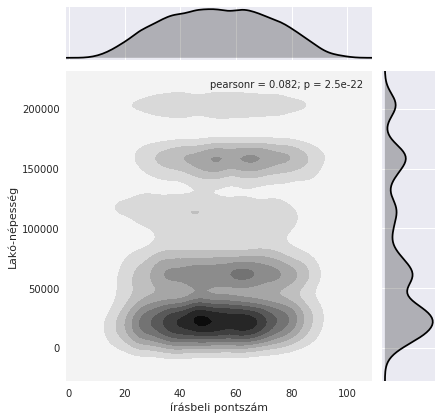

In [16]:
x,y='írásbeli pontszám','Lakó-népesség'
sns.jointplot(x=x, y=y, data=mdf,kind="kde", color="k")

Szóban pedig a kisebbek ...

/home/horvath.anna/.local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


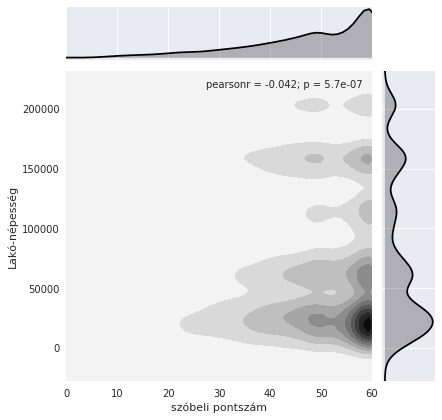

In [17]:
import seaborn as sns
x,y='szóbeli pontszám','Lakó-népesség'
sns.jointplot(x=x, y=y, data=mdf,kind="kde", color="k",xlim=(0,60))

### Left join

Össze tudjuk úgy is fésülni a táblázatokat, hogy az egyik tábázat minden sorát használjuk, és ahol a másik táblázatnak nincs megfelelő sora, akkor is visszaadjuk az adott sort.

Például keressük meg azokat a városokat, ahol nem írtak fizika érettségit 2014-ben. ( Vagy csak a táblázatunkból hiányzik.)

Először keressük meg a városokat ahol írtak.

In [18]:
df14=df[df['év']==2014]
fizcit=df14[['intézmény városa']].drop_duplicates().reset_index(drop=True)
fizcit.head()

,intézmény városa
0,Budapest
1,Pécs
2,Kiskunhalas
3,Kecskemét
4,Kalocsa


Keressük meg az összes létező várost.

In [19]:
allcit=h[h['jogállása']=='város'][
    ['Helység megnevezése']].reset_index(drop=True)
allcit.head()

,Helység megnevezése
0,Aba
1,Abádszalók
2,Abaújszántó
3,Abony
4,Ács


Fésüljük össze őket úgy, hogy az összes létező várost visszakapjuk.

In [20]:
lj=allcit.merge(fizcit,how='left',right_on='intézmény városa',
                left_on='Helység megnevezése')
lj

,Helység megnevezése,intézmény városa
0,Aba,NaN
1,Abádszalók,NaN
2,Abaújszántó,NaN
3,Abony,NaN
4,Ács,NaN
5,Adony,NaN
6,Ajak,NaN
7,Ajka,Ajka
8,Albertirsa,NaN
9,Alsózsolca,NaN


Keressük ki azokat a városokat, ahol a fizika érettségis táblázat oszlopának értéke hiányzik.

In [21]:
lj[pd.isnull(lj['intézmény városa'])]

,Helység megnevezése,intézmény városa
0,Aba,NaN
1,Abádszalók,NaN
2,Abaújszántó,NaN
3,Abony,NaN
4,Ács,NaN
5,Adony,NaN
6,Ajak,NaN
8,Albertirsa,NaN
9,Alsózsolca,NaN
11,Bábolna,NaN


#### További join lehetőségek:
- Right outer (minden jobb sor)
- Full outer (minden bal es jobb sor)
- Cross join, Descartes-szorzat ( pandasban csak hekkelve)

#### Gyengeségek:
- Csak konkrét azonos értekekkel lehet joinolni, nem lehet olyat mondani, hogy azokat add vissza, ahol A táblázat x oszlopának abszolút értéke B táblázat y oszlopának abszolútértéke között a különbség kisebb mint 5. Pedig ez SQL-ben triviális. (Ha ilyesmire van szükségünk, forduljunk az sqlite-csomaghoz.)

## Contains

Ha egy stringeket tartalmazó oszlopban végig kell néznünk, hogy megvan-e valamilyen karaktersorozat:

In [22]:
df[df["intézmény városa"].str.contains("Buda")].tail()['intézmény városa']

21602     Budaörs
21631     Budaörs
21632    Budapest
21642     Budaörs
21643     Budaörs
Name: intézmény városa, dtype: object

## Apply

Ha egy tetszőleges függvényt szeretnénk egy oszlop minden egyes elemére alkalmazni, megtehetjük az `apply` segítségével. Az apply belsejébe írjuk a függvényt, amit alkalmazni szeretnénk.

Elsőként például készítünk egy függvényt, ami egy számhoz hozzáad egyet:

In [23]:
def hozzaad(x):
    return x+1

Ezek után építsünk lakásokat.

In [24]:
h['Lakások száma'].head()

0    1546
1    2038
2     241
3    1188
4      58
Name: Lakások száma, dtype: int64

In [25]:
h['Lakások száma'].apply(hozzaad).head()

0    1547
1    2039
2     242
3    1189
4      59
Name: Lakások száma, dtype: int64

Az apply-t is lehet soronként is végeztetni az `axis=1` kulcsszó segítségével. Például írjuk meg kézzel azt a (lassú) függvényt, ami a sor-t lenormálja a sor összegével.

In [26]:
def norm(sor):
    return sor/sor.sum()

In [27]:
df[['írásbeli pontszám','szóbeli pontszám']].apply(norm,axis=1).head()

,írásbeli pontszám,szóbeli pontszám
0,NaN,NaN
1,NaN,NaN
2,0.589041,0.410959
3,0.377049,0.622951
4,0.523810,0.476190


## Pivot

Az eredetileg oszlopként szereplő értékek szerint csoportosíthatjuk, és újrarendezhetjük a táblázatot. ( Hosszú formájú táblázatból, ami egyedi rekordokat tartalmaz, széles formájú táblázatot készítünk. )

Készítsük el minden megyére az írásbeli pontszámok mediánjának alakulását az évek során.

In [28]:
df.pivot_table(values='írásbeli pontszám',
               columns='év',
               index='intézmény megyéje',
               aggfunc=np.median)

év,2011,2012,2013,2014,2015
intézmény megyéje,,,,,
Baranya,83.0,54.0,57.0,55.0,53.0
Borsod-Abaúj-Zemplén,67.5,51.0,58.0,54.0,52.0
Budapest,74.0,59.0,60.0,61.0,61.0
Bács-Kiskun,77.5,49.5,55.0,56.5,54.0
Békés,78.0,42.0,50.0,47.0,50.0
Csongrád,78.0,53.0,59.0,59.0,56.0
Fejér,79.5,47.0,57.0,51.5,48.0
Gyõr-Moson-Sopron,81.0,52.0,59.0,63.0,56.0
Hajdú-Bihar,68.5,42.0,55.0,54.0,57.0
